In [ ]:
import tensorflow as tf


In [ ]:
#!gdown https://drive.google.com/uc?id=1Gd7xz5eWUTpsBICZMn25I7XTxYjrr6ZS
!gdown https://drive.google.com/uc?id=1pkm_EwUCmEEklmFwemaR0ZkF_Q5td5CL


Downloading...
From: https://drive.google.com/uc?id=1pkm_EwUCmEEklmFwemaR0ZkF_Q5td5CL
To: /content/dataset2.zip
35.3MB [00:01, 33.2MB/s]


In [ ]:
!unzip /content/dataset2.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset/Abnormal/moderateDem5.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem50.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem51.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem6.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem7.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem8.jpg  
  inflating: dataset/dataset/Abnormal/moderateDem9.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem0.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem10.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem100.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1000.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1001.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1002.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1003.jpg  
  inflating: dataset/dataset/Abnormal/verymildDem1004.jpg  
  inflating: data

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import os

dir_names = ['Abnormal', 'Normal']

directory = 'dataset/dataset'

files = []
y = []

for i in range(0, len(dir_names)):
    folder = os.path.join(directory, dir_names[i])
    for file in os.listdir(folder):
        if "desktop.ini" not in file:
          files.append(os.path.join(folder, file))
          if dir_names[i] == 'Abnormal':
              y.append(0)
          else:
              y.append(1)

In [ ]:
import numpy as np
img_height = 208
img_width = 176
channels = 3

X = np.ndarray(shape=(len(files), img_height, img_width, channels), dtype=np.float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
i = 0
for file in files:
    img = load_img(file)
    img.thumbnail((img_width, img_height))
    sample = img_to_array(img)
    X[i] = sample
    i += 1

X /= 255

In [ ]:
from sklearn.utils import shuffle

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# VGG16

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras import metrics

In [ ]:
#VGG16 MODEL

def VGG16():
  model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(208,176,3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(2, activation='softmax')     
  ])

  optimizer = optimizers.Adam(learning_rate=0.00001)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

  return model

In [ ]:
vgg16_model = VGG16()
print(vgg16_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 208, 176, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 208, 176, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 104, 88, 64)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 104, 88, 128)      73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 104, 88, 128)      147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 52, 44, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 52, 44, 256)      

In [ ]:
#Callbacks
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
vgg_data = vgg16_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=100, verbose=1, callbacks=[early])

Epoch 1/100
32/32 [==============================] - 22s 644ms/step - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6912 - val_accuracy: 0.4961
Epoch 2/100
32/32 [==============================] - 20s 636ms/step - loss: 0.6891 - accuracy: 0.5319 - val_loss: 0.6746 - val_accuracy: 0.5967
Epoch 3/100
32/32 [==============================] - 20s 637ms/step - loss: 0.6512 - accuracy: 0.6536 - val_loss: 0.6828 - val_accuracy: 0.5898
Epoch 4/100
32/32 [==============================] - 20s 637ms/step - loss: 0.6379 - accuracy: 0.6449 - val_loss: 0.6009 - val_accuracy: 0.6865
Epoch 5/100
32/32 [==============================] - 20s 637ms/step - loss: 0.5990 - accuracy: 0.6866 - val_loss: 0.5956 - val_accuracy: 0.6973
Epoch 6/100
32/32 [==============================] - 20s 636ms/step - loss: 0.5911 - accuracy: 0.6824 - val_loss: 0.5933 - val_accuracy: 0.7021
Epoch 7/100
32/32 [==============================] - 20s 636ms/step - loss: 0.5857 - accuracy: 0.6913 - val_loss: 0.5855 - val_accuracy:

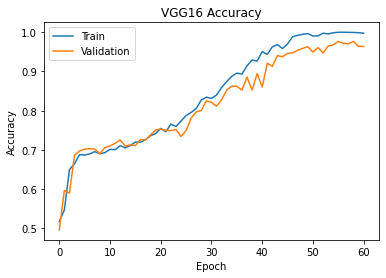

In [ ]:
import matplotlib.pyplot as plt

plt.plot(vgg_data.history['accuracy'])
plt.plot(vgg_data.history['val_accuracy'])
plt.title('VGG16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

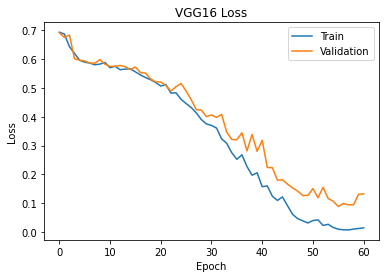

In [ ]:
plt.plot(vgg_data.history['loss'])
plt.plot(vgg_data.history['val_loss'])
plt.title('VGG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
print(vgg16_model.evaluate(X_test,y_test))

40/40 [==============================] - 2s 49ms/step - loss: 0.1048 - accuracy: 0.9625
[0.10479313135147095, 0.9624999761581421]


In [ ]:
y_pred = vgg16_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

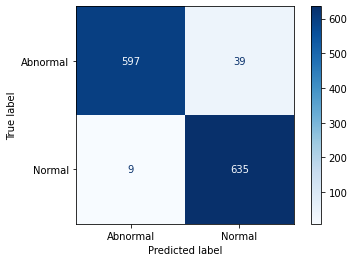

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

c_m = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=dir_names)
disp.plot(cmap='Blues', values_format='d')

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

vgg16_accuracy = (tp + tn) / (tp + fn + fp + tn)

vgg16_precision = tp / (tp + fp)

vgg16_recall = tp / (tp + fn)

vgg16_F1 = 2 * ((vgg16_precision * vgg16_recall) / (vgg16_precision + vgg16_recall))

In [ ]:
print('VGG16 Accuracy', vgg16_accuracy)
print('VGG16 Precision:', vgg16_precision)
print('VGG16 Recall:', vgg16_recall)
print('VGG16 F1 Score:', vgg16_F1)

VGG16 Accuracy 0.9625
VGG16 Precision: 0.9421364985163204
VGG16 Recall: 0.9860248447204969
VGG16 F1 Score: 0.9635811836115326


# My Model

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=2888eebfc096e41949289ca30540d28f0e8ea193730d7368358af9b0594042d2
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=ee4844db0fec7247c61cff8ac52206de6008d29e1d3914c1a283e562e3bcf598
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner.tuners import RandomSearch
from keras.layers import BatchNormalization
from keras.layers import Dropout
def build_model(hp):
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu')),
  model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu')),
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))),
  model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.2, step=0.05))),

  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu')),
  model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu')),
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu')),
  model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu')),
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.2, step=0.05))),

  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-4,1e-5])), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='my_mo'
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
dropout_1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
dropout_2 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 1e-05], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_split=.2, verbose=1)

Trial 3 Complete [00h 01m 20s]
val_accuracy: 0.740234375

Best val_accuracy So Far: 0.8896484375
Total elapsed time: 00h 04m 17s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_mo/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.2
dropout_2: 0.1
learning_rate: 0.0001
Score: 0.8896484375
Trial summary
Hyperparameters:
dropout_1: 0.05
dropout_2: 0.1
learning_rate: 1e-05
Score: 0.740234375
Trial summary
Hyperparameters:
dropout_1: 0.30000000000000004
dropout_2: 0.15000000000000002
learning_rate: 1e-05
Score: 0.6328125


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
my_model = tuner.hypermodel.build(best_hps)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)
my_model_data = my_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[callback])

Epoch 1/100
128/128 [==============================] - 16s 119ms/step - loss: 0.6961 - accuracy: 0.5619 - val_loss: 0.6748 - val_accuracy: 0.5605
Epoch 2/100
128/128 [==============================] - 15s 117ms/step - loss: 0.6117 - accuracy: 0.6597 - val_loss: 0.5334 - val_accuracy: 0.7354
Epoch 3/100
128/128 [==============================] - 15s 117ms/step - loss: 0.5289 - accuracy: 0.7283 - val_loss: 0.4788 - val_accuracy: 0.7666
Epoch 4/100
128/128 [==============================] - 15s 118ms/step - loss: 0.4427 - accuracy: 0.7886 - val_loss: 0.4100 - val_accuracy: 0.8125
Epoch 5/100
128/128 [==============================] - 15s 117ms/step - loss: 0.3385 - accuracy: 0.8491 - val_loss: 0.3330 - val_accuracy: 0.8506
Epoch 6/100
128/128 [==============================] - 15s 115ms/step - loss: 0.2287 - accuracy: 0.9086 - val_loss: 0.2268 - val_accuracy: 0.9082
Epoch 7/100
128/128 [==============================] - 15s 117ms/step - loss: 0.1490 - accuracy: 0.9464 - val_loss: 0.1569 -

In [ ]:
print(my_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 208, 176, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 208, 176, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 104, 88, 64)         0         
_________________________________________________________________
dropout (Dropout)            (32, 104, 88, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 104, 88, 128)        73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (32, 104, 88, 128)        147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 52, 44, 128)         0

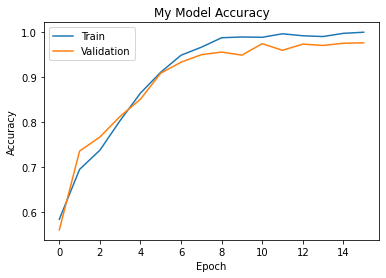

In [ ]:
import matplotlib.pyplot as plt

#Accuracy Plot
plt.plot(my_model_data.history['accuracy'])
plt.plot(my_model_data.history['val_accuracy'])
plt.title('My Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

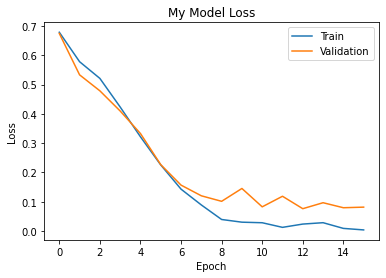

In [ ]:
#Loss Plot
plt.plot(my_model_data.history['loss'])
plt.plot(my_model_data.history['val_loss'])
plt.title('My Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
print(my_model.evaluate(X_test,y_test))

40/40 [==============================] - 1s 33ms/step - loss: 0.0943 - accuracy: 0.9656
[0.09432290494441986, 0.965624988079071]


In [ ]:
y_pred = my_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

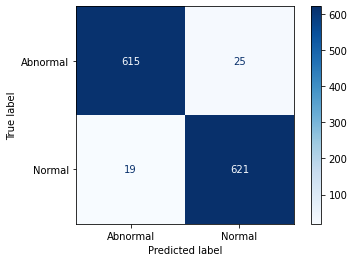

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

c_m = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=dir_names)
disp.plot(cmap='Blues', values_format='d')


In [ ]:
my_accuracy = (tp + tn) / (tp + fn + fp + tn)

my_precision = tp / (tp + fp)

my_recall = tp / (tp + fn)

my_F1 = 2 * ((my_precision * my_recall) / (my_precision + my_recall))

In [ ]:
print('My Model Accuracy:', my_accuracy)
print('My Model Precision:', my_precision)
print('My Model Recall:', my_recall)
print('My Model F1 Score:', my_F1)

My Model Accuracy: 0.965625
My Model Precision: 0.9613003095975232
My Model Recall: 0.9703125
My Model F1 Score: 0.9657853810264386


# AlexNet

In [ ]:
alexnet = models.Sequential()

alexnet.add(Conv2D(filters=96, input_shape=(208,176,3), kernel_size=(11,11), strides=(4,4)))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
alexnet.add(Activation('relu'))

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
alexnet.add(Activation('relu'))

alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Flatten())
alexnet.add(Dense(4096, input_shape=(32,32,3,)))
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.2))

alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.3))

alexnet.add(Dense(2))
alexnet.add(Activation('softmax'))

optimizer = optimizers.RMSprop(learning_rate=0.0005)

alexnet.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [ ]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 42, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 50, 42, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 20, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 20, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 24, 20, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 9, 256)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 9, 384)       

In [ ]:
AN_data = alexnet.fit(X_train, y_train, validation_split=.2, epochs=100, batch_size=64)

Epoch 1/100
64/64 [==============================] - 5s 46ms/step - loss: 13.6083 - acc: 0.5057 - val_loss: 0.6929 - val_acc: 0.5078
Epoch 2/100
64/64 [==============================] - 3s 42ms/step - loss: 0.6946 - acc: 0.4923 - val_loss: 0.6971 - val_acc: 0.4922
Epoch 3/100
64/64 [==============================] - 3s 43ms/step - loss: 0.7083 - acc: 0.5126 - val_loss: 0.6930 - val_acc: 0.4922
Epoch 4/100
64/64 [==============================] - 3s 43ms/step - loss: 0.7029 - acc: 0.5199 - val_loss: 0.6929 - val_acc: 0.5078
Epoch 5/100
64/64 [==============================] - 3s 42ms/step - loss: 0.7363 - acc: 0.5288 - val_loss: 0.7336 - val_acc: 0.5000
Epoch 6/100
64/64 [==============================] - 3s 43ms/step - loss: 0.6999 - acc: 0.5033 - val_loss: 0.6923 - val_acc: 0.5078
Epoch 7/100
64/64 [==============================] - 3s 42ms/step - loss: 0.6925 - acc: 0.5533 - val_loss: 0.6900 - val_acc: 0.5078
Epoch 8/100
64/64 [==============================] - 3s 42ms/step - loss: 0

In [ ]:
_AN = alexnet.evaluate(X_test, y_test)

40/40 [==============================] - 1s 10ms/step - loss: 0.1261 - acc: 0.9641


In [ ]:
AN_results = alexnet.predict(X_test)
AN_y_pred = (AN_results > 0.5).astype(int)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
AN_F1 = f1_score(y_test.argmax(axis=1), AN_results.argmax(axis=1))
AN_prec = precision_score(y_test.argmax(axis=1), AN_results.argmax(axis=1))
AN_rec = recall_score(y_test.argmax(axis=1), AN_results.argmax(axis=1))
AN_c_m = confusion_matrix(y_test.argmax(axis=1), AN_y_pred.argmax(axis=1))
print(f'AlexNet F1: {AN_F1}')
print(f'AlexNet Precision: {AN_prec}')
print(f'AlexNet Recall: {AN_rec}')
print(f'AlexNet Confusion Matrix: {AN_c_m}')

AlexNet F1: 0.9643962848297214
AlexNet Precision: 0.9614197530864198
AlexNet Recall: 0.967391304347826
AlexNet Confusion Matrix: [[611  25]
 [ 21 623]]


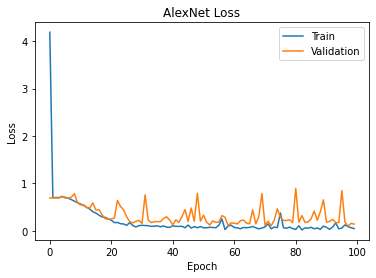

In [ ]:
fig, ax3 = plt.subplots()
ax3.plot(AN_data.history['loss'], label='Train')
ax3.plot(AN_data.history['val_loss'], label='Validation')
plt.title('AlexNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
ax3.legend()
plt.show()

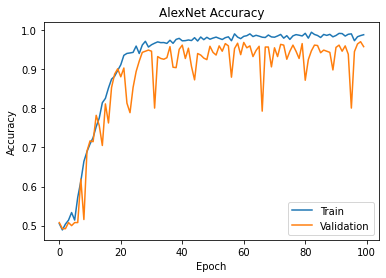

In [ ]:
fig, ax4 = plt.subplots()
ax4.plot(AN_data.history['acc'], label='Train')
ax4.plot(AN_data.history['val_acc'], label='Validation')
plt.title('AlexNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
ax4.legend()
plt.show()

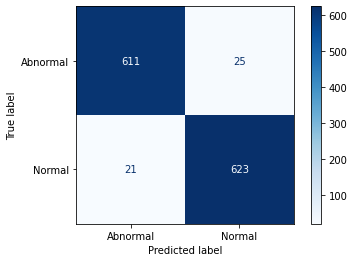

In [ ]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=AN_c_m, display_labels=dir_names)
disp2.plot(cmap='Blues', values_format='d')